In [1]:
import pandas as pd
import numpy as np
!pip install sweetviz
import sweetviz as sv
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#!pip uninstall numpy pandas
#!pip install numpy pandas

In [7]:
merged_df = pd.read_csv(r"C:\Users\user\OneDrive\שולחן העבודה\Project Avital Spaceship Titanic\merged_df.csv",index_col=0)

In [9]:
merged_df.describe()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,b
count,12970.000000,12660.000000,12700.000000,12674.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000,12671.000000
mean,463535.258597,0.361848,28.771969,0.021540,222.897852,451.961675,174.906033,308.476904,306.789482,603.601926
std,268590.436106,0.480554,14.387261,0.145182,647.596664,1584.370747,590.558690,1130.279641,1180.097223,512.891926
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,230629.750000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,170.000000
50%,463201.500000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000
75%,692476.000000,1.000000,38.000000,0.000000,49.000000,77.000000,29.000000,57.000000,42.000000,1008.000000
max,928002.000000,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000


In [10]:
#dummy-כל הערכים שהם BOL - כן/לא
merged_df_dummy = merged_df[[col for col in merged_df if np.isin(merged_df[col].dropna().unique(), [0, 1]).all()]]
merged_df_dummy

,CryoSleep,VIP,Transported
0,1.0,0.0,NaN
1,0.0,0.0,NaN
2,1.0,0.0,NaN
3,0.0,0.0,NaN
4,0.0,0.0,NaN
...,...,...,...
12965,0.0,1.0,False
12966,1.0,0.0,False
12967,0.0,0.0,True
12968,0.0,0.0,False


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


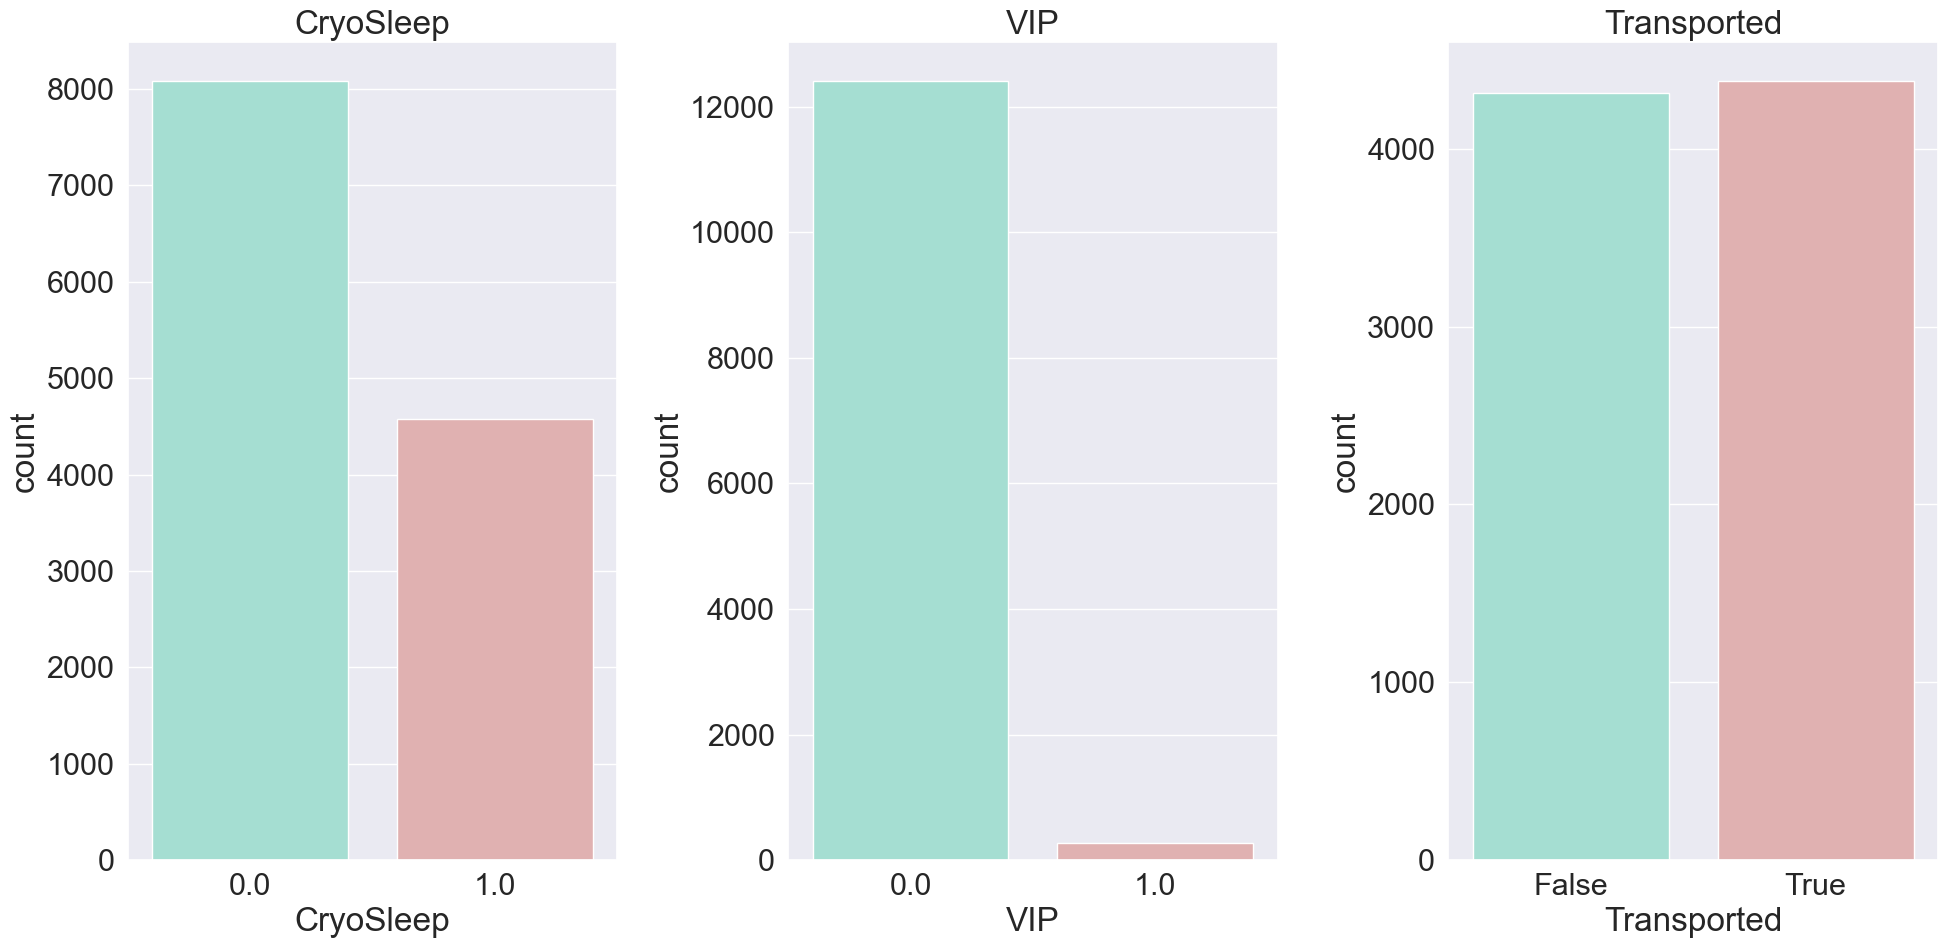

In [11]:
#dummies graph
#a=number of rows

a=1
b=3
c=1

fig= plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 0.8)
sns.set(font_scale = 2)
for i in merged_df_dummy:
    plt.subplot(a,b,c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.countplot(merged_df_dummy[i],palette=['#9BE8D8', '#E8A9A9'])
    c=c+1
fig.tight_layout()
plt.show()

In [12]:
merged_df_num=merged_df._get_numeric_data()
merged_df_num.shape

(12970, 10)

In [13]:
merged_df['HomePlanet']

0         Earth
1         Earth
2        Europa
3        Europa
4         Earth
          ...  
12965    Europa
12966     Earth
12967     Earth
12968    Europa
12969    Europa
Name: HomePlanet, Length: 12970, dtype: object

In [14]:
Destination = merged_df['Destination']
HomePlanet = merged_df['HomePlanet']
categorial_df = pd.concat([Destination, HomePlanet], axis=1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


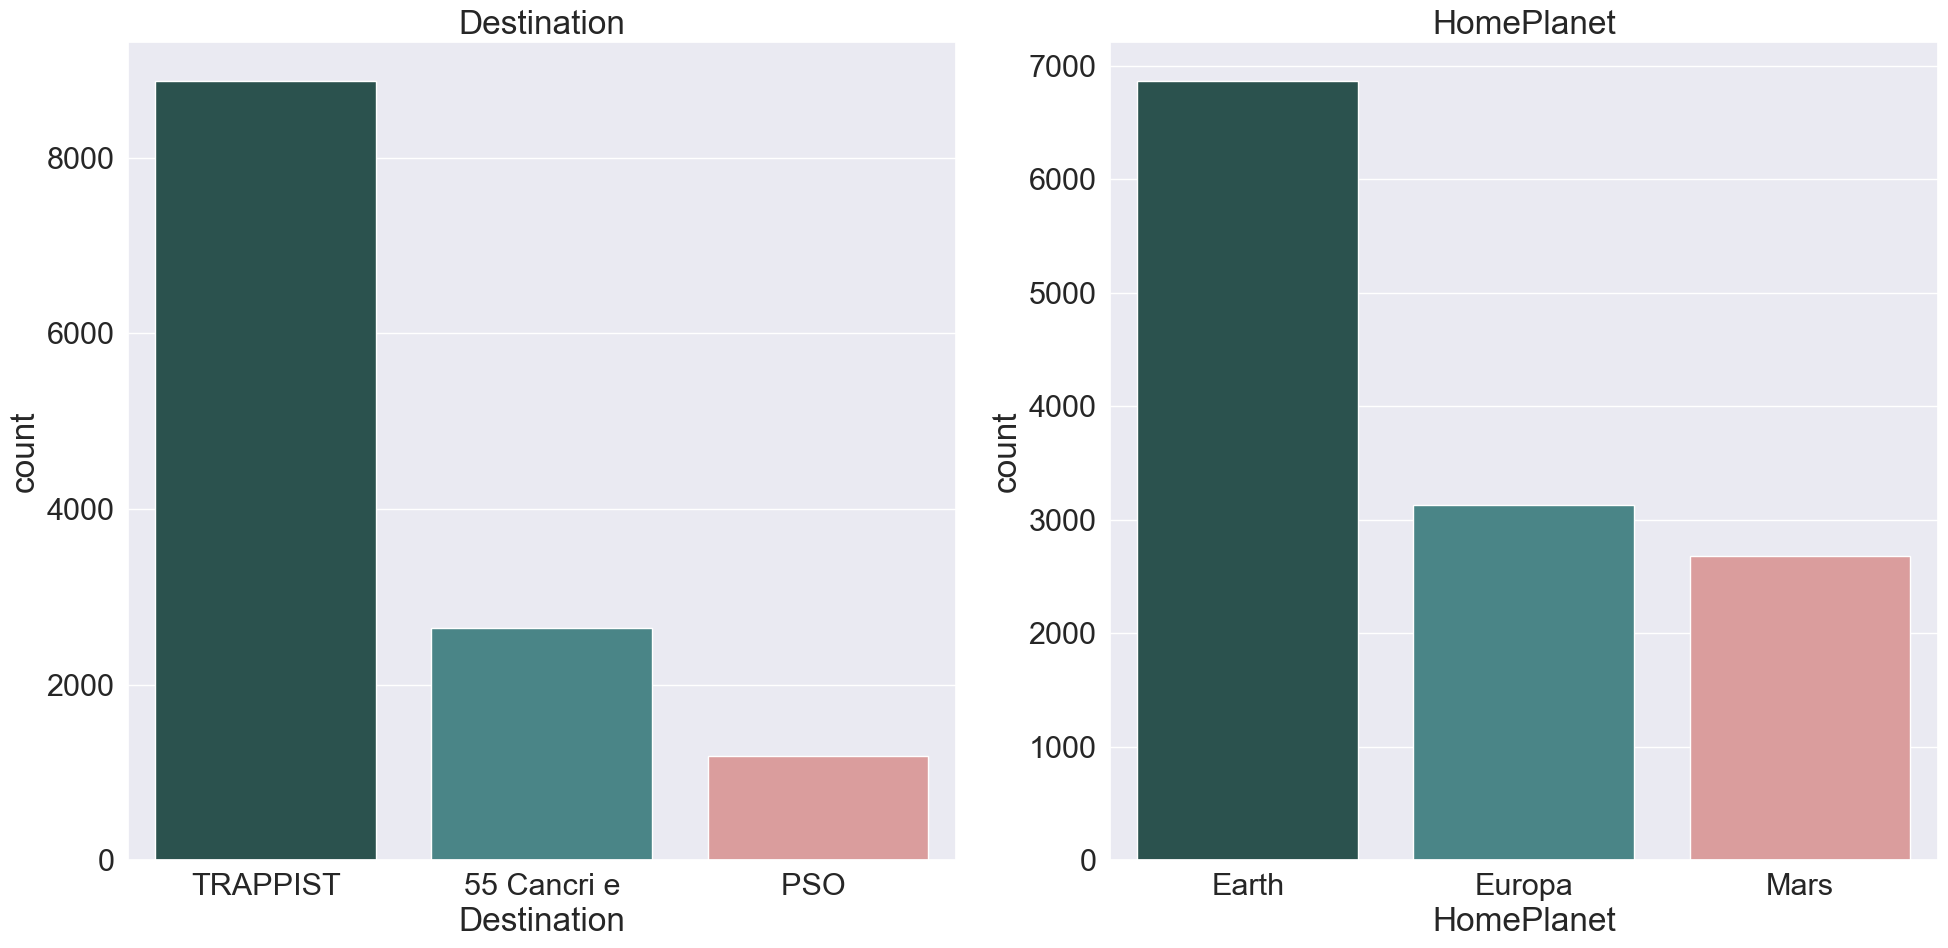

In [26]:
#categorial graph
#a=number of rows

a=1
b=2
c=1

fig= plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 0.8)
sns.set(font_scale = 2)
for i in categorial_df:
    plt.subplot(a,b,c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.countplot(categorial_df[i],palette=['#245953', '#408E91', '#E49393'])
    c=c+1
fig.tight_layout()
plt.show()

In [16]:
Age = merged_df['Age']
RoomService = merged_df['RoomService']
FoodCourt = merged_df['FoodCourt']
ShoppingMall = merged_df['ShoppingMall']
Spa = merged_df['Spa']
VRDeck = merged_df['VRDeck']
continuous_df = pd.concat([Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck], axis=1)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

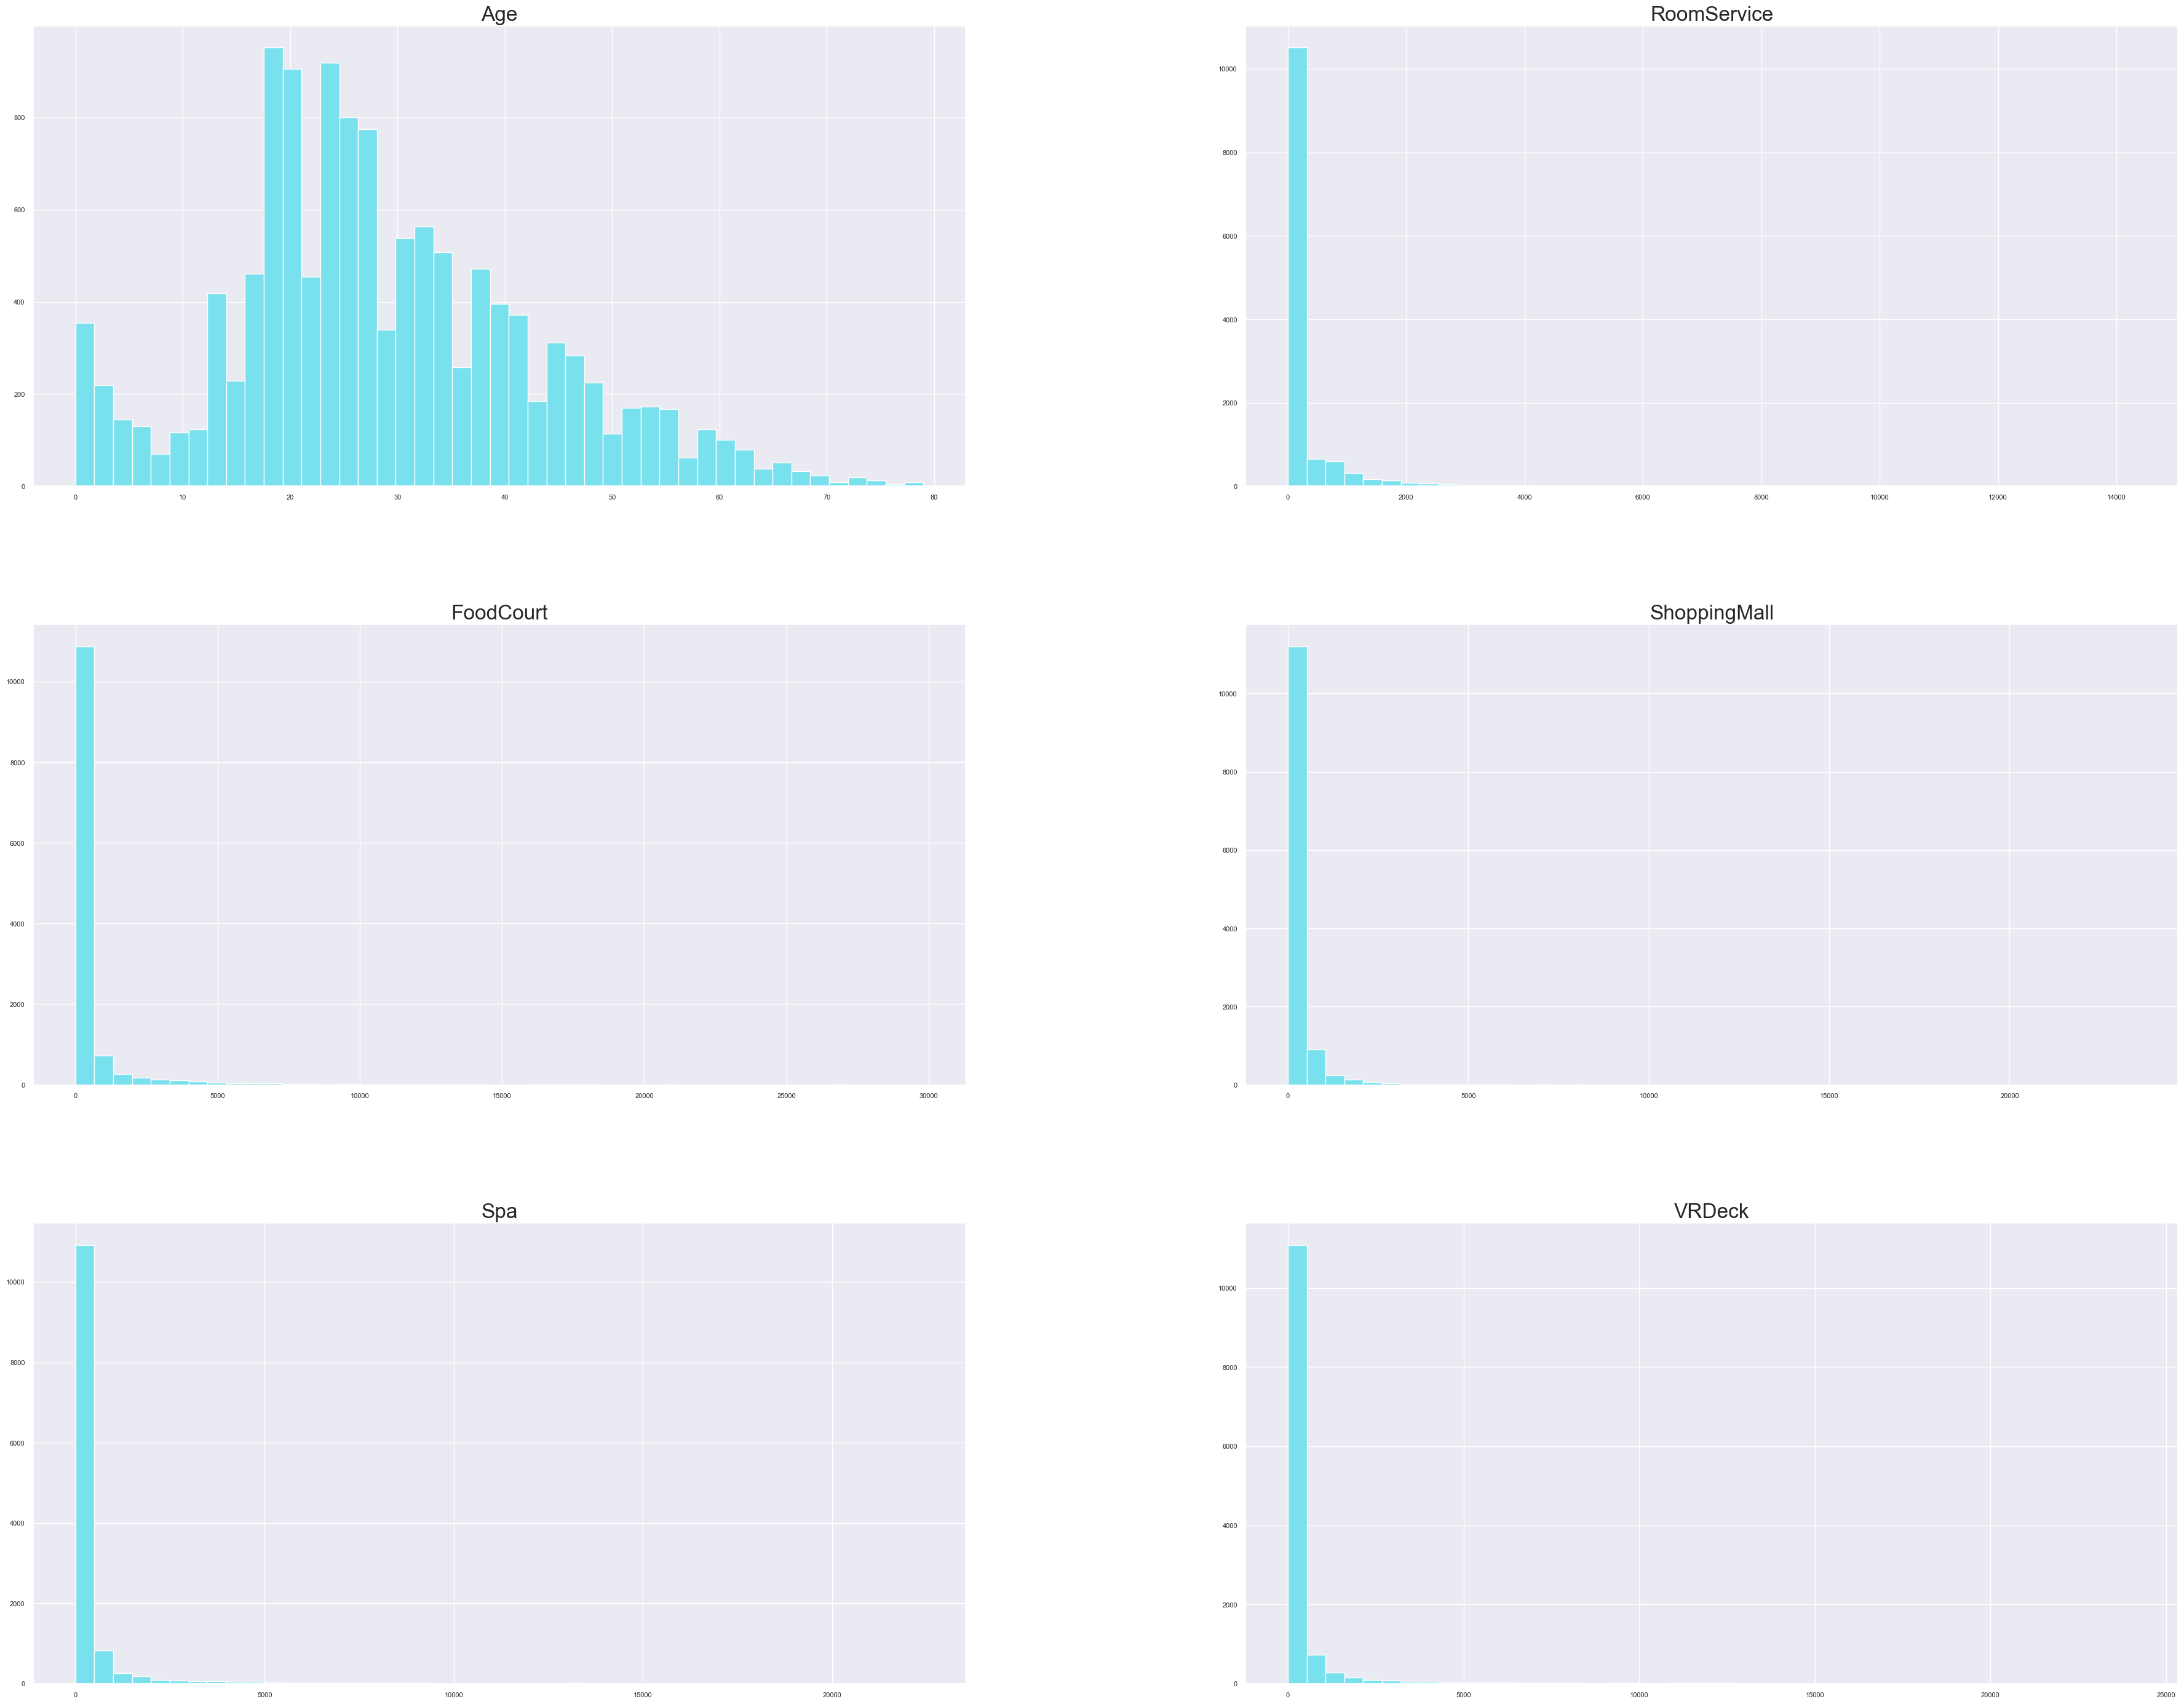

In [17]:
#continuous graph רציפים
#a=number of rows

continuous_df.hist(figsize=(45,35), bins=45, xlabelsize=8, ylabelsize=8, color= '#79E0EE')

In [18]:
merged_df['Spa'].value_counts()

0.0       7935
1.0        218
2.0        148
3.0         82
4.0         73
          ... 
4303.0       1
82.0         1
3427.0       1
5732.0       1
1643.0       1
Name: Spa, Length: 1679, dtype: int64

In [19]:
# We will check the correlation between the data

In [20]:
corr = merged_df.corr(method='spearman')
print(corr)

              PassengerId  CryoSleep       Age       VIP  RoomService  \
PassengerId      1.000000  -0.003850 -0.009112  0.012341     0.000600   
CryoSleep       -0.003850   1.000000 -0.066778 -0.079417    -0.532396   
Age             -0.009112  -0.066778  1.000000  0.095139     0.107778   
VIP              0.012341  -0.079417  0.095139  1.000000     0.058882   
RoomService      0.000600  -0.532396  0.107778  0.058882     1.000000   
FoodCourt        0.001192  -0.543542  0.196179  0.110041     0.184682   
ShoppingMall     0.000954  -0.525830  0.091068  0.048628     0.444175   
Spa              0.006117  -0.561076  0.191894  0.089094     0.248988   
VRDeck           0.002751  -0.536786  0.172759  0.092381     0.187203   
b                0.695561  -0.031406 -0.161860 -0.105178     0.059607   

              FoodCourt  ShoppingMall       Spa    VRDeck         b  
PassengerId    0.001192      0.000954  0.006117  0.002751  0.695561  
CryoSleep     -0.543542     -0.525830 -0.561076 -0.53678

In [21]:
corr.style.background_gradient(cmap=sns.diverging_palette(310, 600, as_cmap=True)).set_precision(4)

C:\Users\user\AppData\Local\Temp\ipykernel_25224\1184178769.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap=sns.diverging_palette(310, 600, as_cmap=True)).set_precision(4)


,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,b
PassengerId,1.0000,-0.0038,-0.0091,0.0123,0.0006,0.0012,0.0010,0.0061,0.0028,0.6956
CryoSleep,-0.0038,1.0000,-0.0668,-0.0794,-0.5324,-0.5435,-0.5258,-0.5611,-0.5368,-0.0314
Age,-0.0091,-0.0668,1.0000,0.0951,0.1078,0.1962,0.0911,0.1919,0.1728,-0.1619
VIP,0.0123,-0.0794,0.0951,1.0000,0.0589,0.1100,0.0486,0.0891,0.0924,-0.1052
RoomService,0.0006,-0.5324,0.1078,0.0589,1.0000,0.1847,0.4442,0.2490,0.1872,0.0596
FoodCourt,0.0012,-0.5435,0.1962,0.1100,0.1847,1.0000,0.1883,0.4768,0.5094,-0.1416
ShoppingMall,0.0010,-0.5258,0.0911,0.0486,0.4442,0.1883,1.0000,0.2621,0.1934,0.0654
Spa,0.0061,-0.5611,0.1919,0.0891,0.2490,0.4768,0.2621,1.0000,0.4489,-0.0959
VRDeck,0.0028,-0.5368,0.1728,0.0924,0.1872,0.5094,0.1934,0.4489,1.0000,-0.1061
b,0.6956,-0.0314,-0.1619,-0.1052,0.0596,-0.1416,0.0654,-0.0959,-0.1061,1.0000


interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

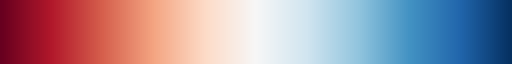

In [22]:
sns.choose_colorbrewer_palette('diverging', as_cmap='True')

the next stages are: data cleansing and outliers